C:\Users\zesty\AppData\Local\Temp\ipykernel_4656\248443127.py:7: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))


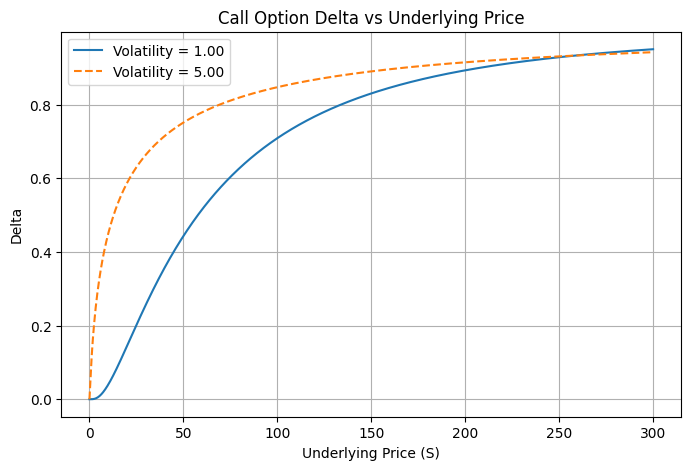

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes call Delta
def call_delta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

# Parameters
K = 100        # Strike price
T = 1.0        # Time to maturity (1 year)
r = 0.05       # Risk-free rate
sigma = 1    # Initial volatility
S = np.linspace(0, 300, 1000)

# Compute deltas for normal and doubled volatility
delta_normal = call_delta(S, K, T, r, sigma)
delta_double = call_delta(S, K, T, r, 2*sigma)

# Plot
plt.figure(figsize=(8,5))
plt.plot(S, delta_normal, label=f'Volatility = {sigma:.2f}')
plt.plot(S, delta_double, label=f'Volatility = {5*sigma:.2f}', linestyle='--')
plt.title('Call Option Delta vs Underlying Price')
plt.xlabel('Underlying Price (S)')
plt.ylabel('Delta')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\zesty\AppData\Local\Temp\ipykernel_4656\3544320022.py:7: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))


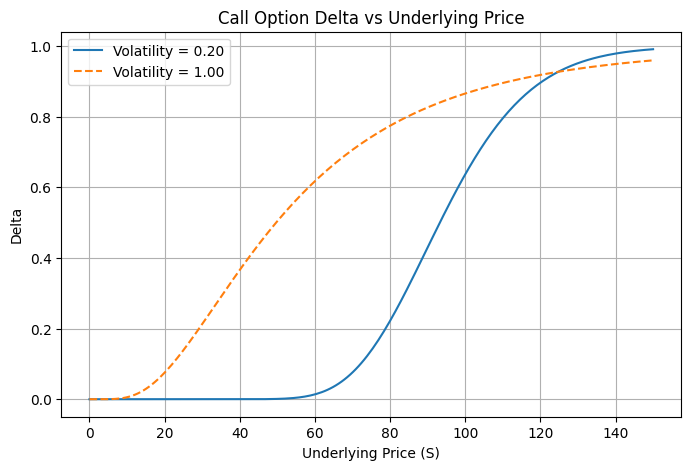

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes call Delta
def call_delta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

# Parameters
K = 100        # Strike price
T = 1       # Time to maturity (1 year)
r = 0.05       # Risk-free rate
sigma = 0.2    # Initial volatility
S = np.linspace(0, 150, 200)

# Compute deltas for normal and doubled volatility
delta_normal = call_delta(S, K, T, r, sigma)
delta_double = call_delta(S, K, T*10, r, sigma)

# Plot
plt.figure(figsize=(8,5))
plt.plot(S, delta_normal, label=f'Volatility = {sigma:.2f}')
plt.plot(S, delta_double, label=f'Volatility = {5*sigma:.2f}', linestyle='--')
plt.title('Call Option Delta vs Underlying Price')
plt.xlabel('Underlying Price (S)')
plt.ylabel('Delta')
plt.legend()
plt.grid(True)
plt.show()

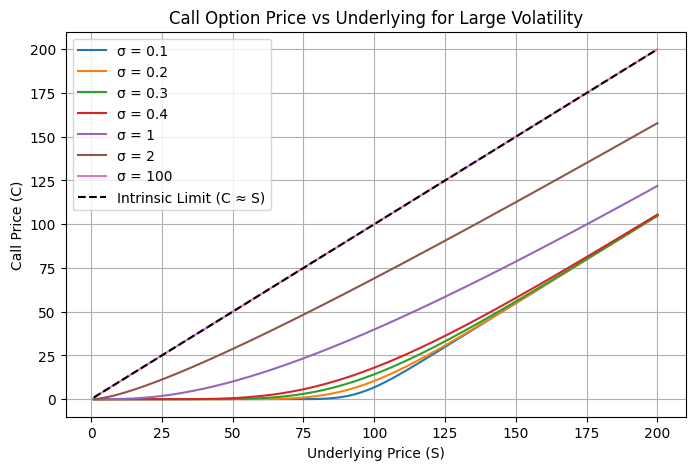

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black–Scholes call price
def call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Parameters
K = 100
T = 1
r = 0.05
S = np.linspace(1, 200, 4000)
sigmas = [0.1,0.2, 0.3,0.4,1,2,100]

# Plot call prices for different volatilities
plt.figure(figsize=(8,5))
for sigma in sigmas:
    plt.plot(S, call_price(S, K, T, r, sigma), label=f'σ = {sigma}')

plt.plot(S, S, 'k--', label='Intrinsic Limit (C ≈ S)')
plt.title('Call Option Price vs Underlying for Large Volatility')
plt.xlabel('Underlying Price (S)')
plt.ylabel('Call Price (C)')
plt.legend()
plt.grid(True)
plt.show()


<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
C:\Users\zesty\AppData\Local\Temp\ipykernel_4656\3633817861.py:27: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(sigmas, approx_calls, '--', label='Approximation: $S_0 \sigma \sqrt{T} / \sqrt{2\pi}$')


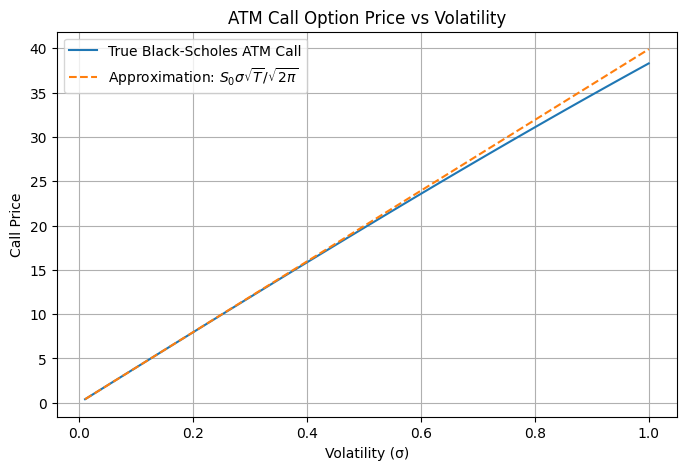

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes call price
def call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Parameters
S0 = 100
K = 100
T = 1.0
r = 0.0
sigmas = np.linspace(0.01, 1.0, 100)

# True Black-Scholes call prices
bs_calls = [call_price(S0, K, T, r, sigma) for sigma in sigmas]

# ATM approximation: C ≈ S0 * sigma * sqrt(T) / sqrt(2π)
approx_calls = [S0 * sigma * np.sqrt(T) / np.sqrt(2 * np.pi) for sigma in sigmas]

# Plot
plt.figure(figsize=(8,5))
plt.plot(sigmas, bs_calls, label='True Black-Scholes ATM Call')
plt.plot(sigmas, approx_calls, '--', label='Approximation: $S_0 \sigma \sqrt{T} / \sqrt{2\pi}$')
plt.title('ATM Call Option Price vs Volatility')
plt.xlabel('Volatility (σ)')
plt.ylabel('Call Price')
plt.legend()
plt.grid(True)
plt.show()


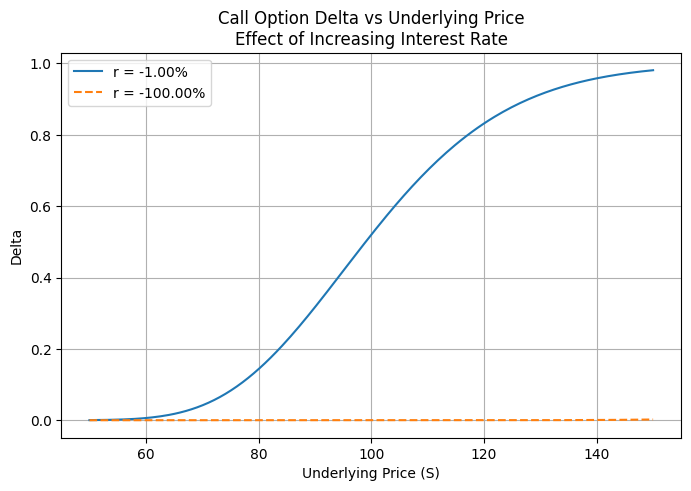

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes call Delta
def call_delta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

# Parameters
K = 100
T = 1.0
sigma = 0.2
r1 = -0.01   # Lower interest rate
r2 = -1   # Higher interest rate
S = np.linspace(50, 150, 200)

# Compute Deltas
delta_low_r = call_delta(S, K, T, r1, sigma)
delta_high_r = call_delta(S, K, T, r2, sigma)

# Plot
plt.figure(figsize=(8,5))
plt.plot(S, delta_low_r, label=f'r = {r1:.2%}')
plt.plot(S, delta_high_r, label=f'r = {r2:.2%}', linestyle='--')
plt.title('Call Option Delta vs Underlying Price\nEffect of Increasing Interest Rate')
plt.xlabel('Underlying Price (S)')
plt.ylabel('Delta')
plt.legend()
plt.grid(True)
plt.show()


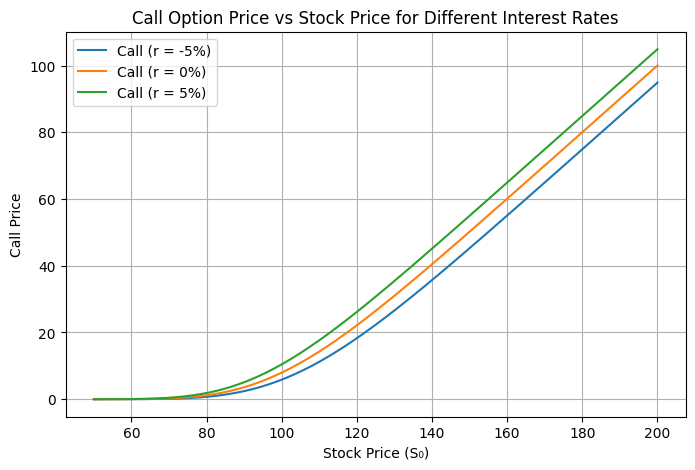

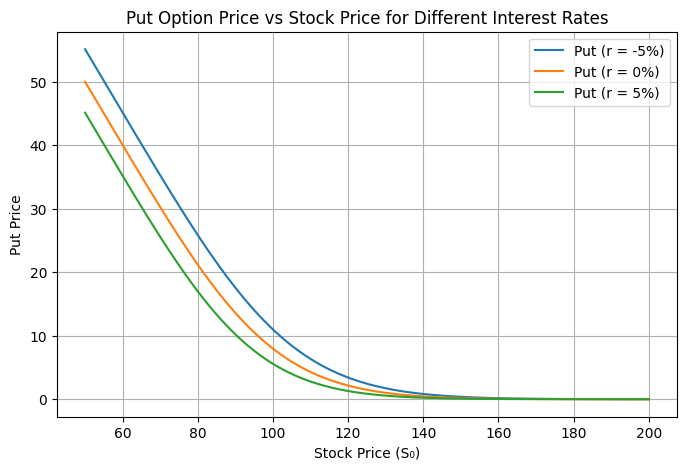

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- Black–Scholes formulas ---
def bs_call_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    put  = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return call, put

# --- Parameters ---
K = 100
T = 1.0
sigma = 0.2
r_values = [-0.05, 0.0, 0.05]  # -5%, 0%, +5%
S_values = np.linspace(50, 200, 200)

# --- Plot Call Prices ---
plt.figure(figsize=(8,5))
for r in r_values:
    calls = [bs_call_put(S, K, T, r, sigma)[0] for S in S_values]
    plt.plot(S_values, calls, label=f'Call (r = {r*100:.0f}%)')
plt.title('Call Option Price vs Stock Price for Different Interest Rates')
plt.xlabel('Stock Price (S₀)')
plt.ylabel('Call Price')
plt.legend()
plt.grid(True)
plt.show()



C:\Users\zesty\AppData\Local\Temp\ipykernel_17140\3631740164.py:7: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
C:\Users\zesty\AppData\Local\Temp\ipykernel_17140\3631740164.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return norm.pdf(d1) / (S * sigma * np.sqrt(T))


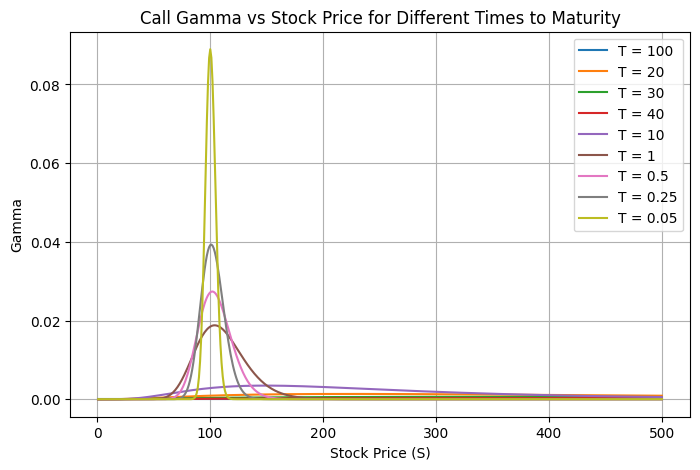

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes gamma
def call_gamma(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

# Parameters
K = 100
r = 0.1
sigma = 0.2

# Range of underlying prices
S_values = np.linspace(0, 500, 500)

# Different times to maturity
T_list = [100,20,30,40,10,1, 0.5, 0.25, 0.05]

plt.figure(figsize=(8,5))
for T in T_list:
    gamma_vals = [call_gamma(S, K, T, r, sigma) for S in S_values]
    plt.plot(S_values, gamma_vals, label=f'T = {T}')

plt.title('Call Gamma vs Stock Price for Different Times to Maturity')
plt.xlabel('Stock Price (S)')
plt.ylabel('Gamma')
plt.legend()
plt.grid(True)
plt.show()


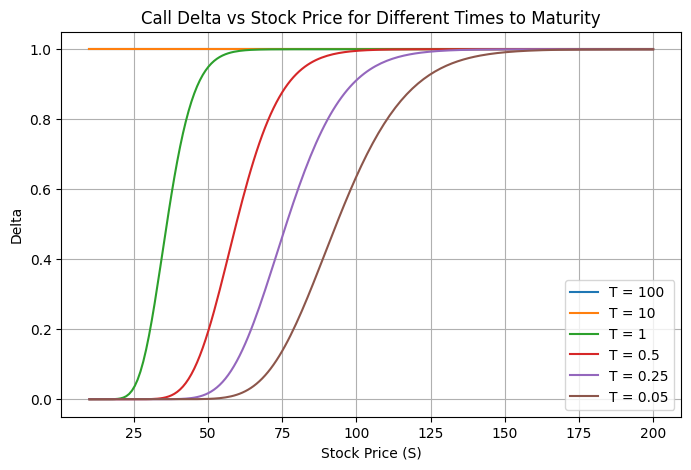

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes call delta
def call_delta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

# Parameters
K = 100
sigma = 0.2
T = 1
# Range of underlying prices
S_values = np.linspace(10, 200, 200)

# Different times to maturity
r_list = [100,10,1, 0.5, 0.25, 0.05]

plt.figure(figsize=(8,5))
for r in r_list:
    delta_vals = [call_delta(S, K, T, r, sigma) for S in S_values]
    plt.plot(S_values, delta_vals, label=f'T = {r}')

plt.title('Call Delta vs Stock Price for Different Times to Maturity')
plt.xlabel('Stock Price (S)')
plt.ylabel('Delta')
plt.legend()
plt.grid(True)
plt.show()


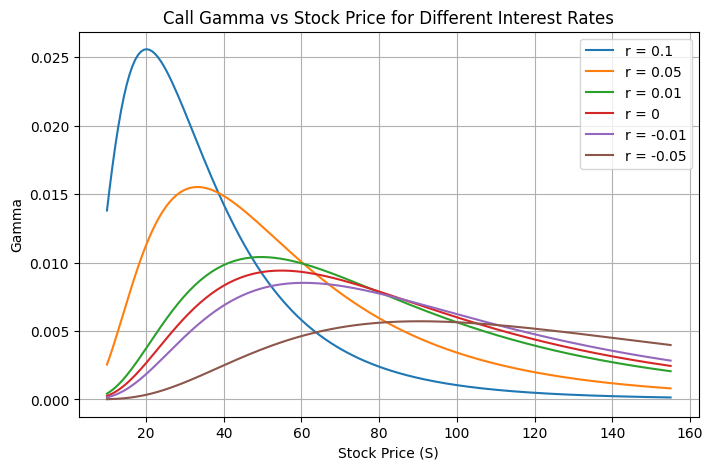

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes gamma function
def call_gamma(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

# Parameters
K = 100
T = 10     # fixed time to maturity
sigma = 0.2  # volatility

# Range of underlying prices
S_values = np.linspace(10, 155, 200)

# Different interest rates to compare
r_list = [0.1,0.05,0.01,0,-0.01,-0.05]

plt.figure(figsize=(8,5))
for r in r_list:
    gamma_vals = [call_gamma(S, K, T, r, sigma) for S in S_values]
    plt.plot(S_values, gamma_vals, label=f'r = {r}')

plt.title('Call Gamma vs Stock Price for Different Interest Rates')
plt.xlabel('Stock Price (S)')
plt.ylabel('Gamma')
plt.legend()
plt.grid(True)
plt.show()


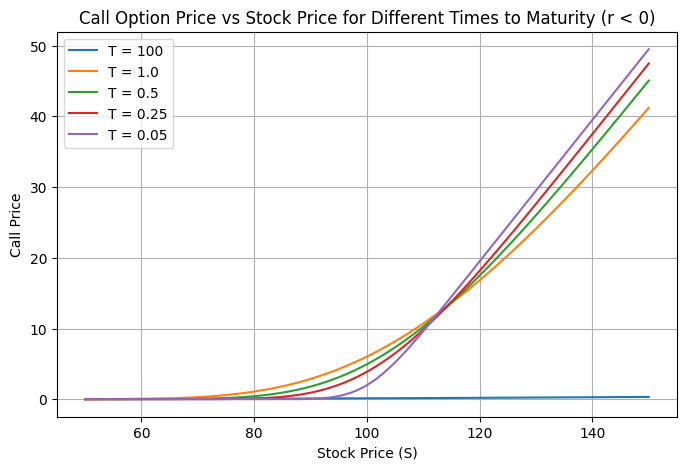

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes call price
def call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Parameters
K = 100
r = -0.01       # fixed negative interest rate
sigma = 0.25    # volatility

# Range of underlying prices
S_values = np.linspace(50, 150, 200)

# Different times to maturity
T_list = [100,1.0, 0.5, 0.25, 0.05]

plt.figure(figsize=(8,5))
for T in T_list:
    call_vals = [call_price(S, K, T, r, sigma) for S in S_values]
    plt.plot(S_values, call_vals, label=f'T = {T}')

plt.title('Call Option Price vs Stock Price for Different Times to Maturity (r < 0)')
plt.xlabel('Stock Price (S)')
plt.ylabel('Call Price')
plt.legend()
plt.grid(True)
plt.show()


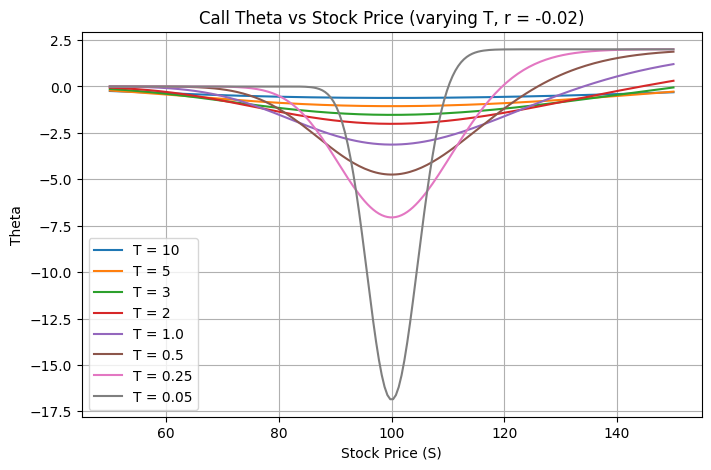

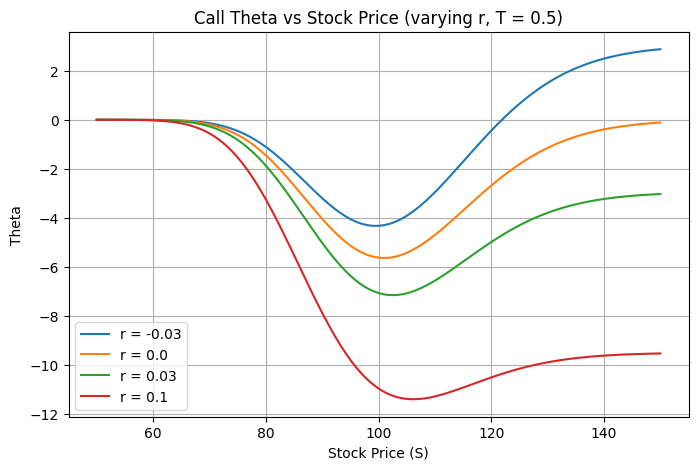

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes call theta
def call_theta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    term1 = -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T))
    term2 = -r * K * np.exp(-r * T) * norm.cdf(d2)
    return term1 + term2

# ---- User adjustable parameters ----
K = 100
sigma = 0.2
S_values = np.linspace(50, 150, 200)

# Input ranges:
T_list = [10,5,3,2,1.0, 0.5, 0.25, 0.05]     # Range of maturities
r_list = [-0.03, 0.00, 0.03, 0.10]  # Range of interest rates

# ---- Plot theta vs S for varying T (fixed r) ----
r_fixed = -0.02  # choose a fixed r for this plot
plt.figure(figsize=(8,5))
for T in T_list:
    theta_vals = [call_theta(S, K, T, r_fixed, sigma) for S in S_values]
    plt.plot(S_values, theta_vals, label=f"T = {T}")
plt.title(f"Call Theta vs Stock Price (varying T, r = {r_fixed})")
plt.xlabel("Stock Price (S)")
plt.ylabel("Theta")
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot theta vs S for varying r (fixed T) ----
T_fixed = 0.5  # choose a fixed T for this plot
plt.figure(figsize=(8,5))
for r in r_list:
    theta_vals = [call_theta(S, K, T_fixed, r, sigma) for S in S_values]
    plt.plot(S_values, theta_vals, label=f"r = {r}")
plt.title(f"Call Theta vs Stock Price (varying r, T = {T_fixed})")
plt.xlabel("Stock Price (S)")
plt.ylabel("Theta")
plt.legend()
plt.grid(True)
plt.show()


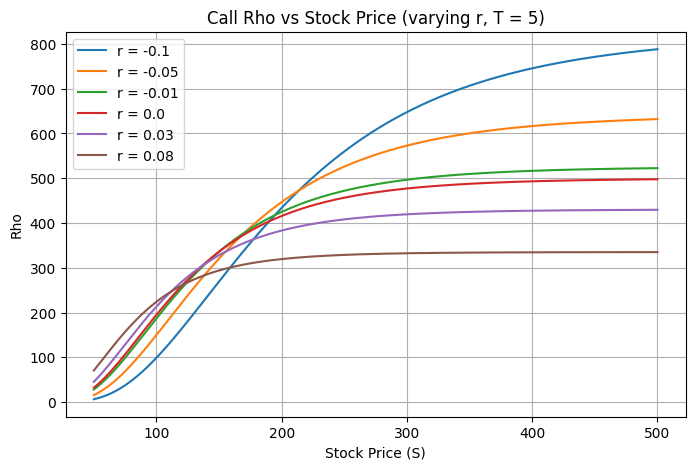

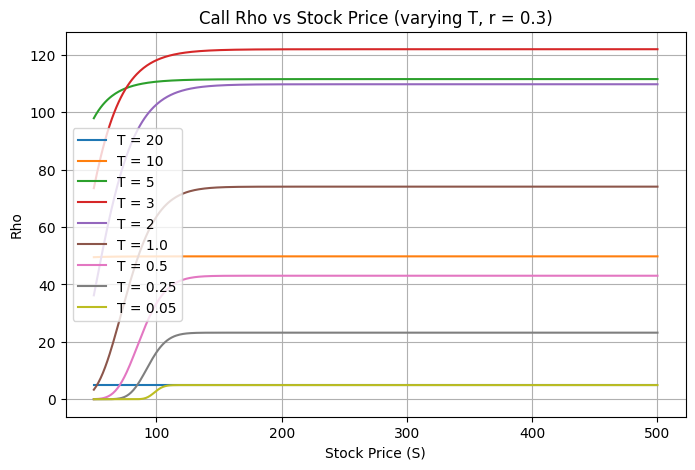

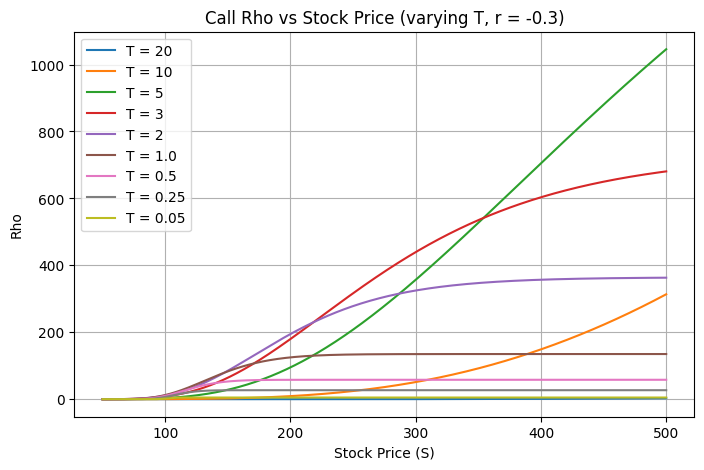

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes call rho
def call_rho(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * T * np.exp(-r * T) * norm.cdf(d2)

# Parameters
K = 100
sigma = 0.25

# Range of underlying prices
S_values = np.linspace(50, 500, 500)

# ---- 1) Rho vs S for varying interest rates (fixed T) ----
T_fixed = 5
r_list = [-0.1,-0.05, -0.01, 0.0, 0.03, 0.08]

plt.figure(figsize=(8,5))
for r in r_list:
    rho_vals = [call_rho(S, K, T_fixed, r, sigma) for S in S_values]
    plt.plot(S_values, rho_vals, label=f"r = {r}")
plt.title(f"Call Rho vs Stock Price (varying r, T = {T_fixed})")
plt.xlabel("Stock Price (S)")
plt.ylabel("Rho")
plt.legend()
plt.grid(True)
plt.show()

# ---- 2) Rho vs S for varying T (fixed positive r) ----
r_pos = 0.3
T_list = [20,10,5,3,2,1.0, 0.5, 0.25, 0.05]

plt.figure(figsize=(8,5))
for T in T_list:
    rho_vals = [call_rho(S, K, T, r_pos, sigma) for S in S_values]
    plt.plot(S_values, rho_vals, label=f"T = {T}")
plt.title(f"Call Rho vs Stock Price (varying T, r = {r_pos})")
plt.xlabel("Stock Price (S)")
plt.ylabel("Rho")
plt.legend()
plt.grid(True)
plt.show()

# ---- 3) Rho vs S for varying T (fixed negative r) ----
r_neg = -0.3

plt.figure(figsize=(8,5))
for T in T_list:
    rho_vals = [call_rho(S, K, T, r_neg, sigma) for S in S_values]
    plt.plot(S_values, rho_vals, label=f"T = {T}")
plt.title(f"Call Rho vs Stock Price (varying T, r = {r_neg})")
plt.xlabel("Stock Price (S)")
plt.ylabel("Rho")
plt.legend()
plt.grid(True)
plt.show()


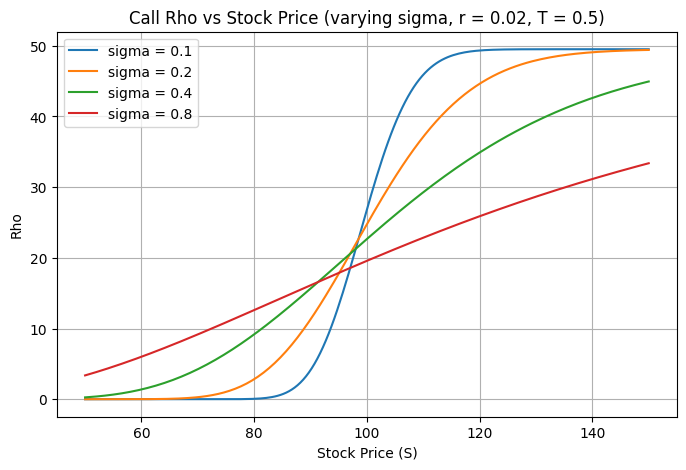

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes call rho
def call_rho(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * T * np.exp(-r * T) * norm.cdf(d2)

# Parameters
K = 100
r = 0.02      # fixed interest rate
T = 0.5       # fixed time to maturity

# Range of underlying prices
S_values = np.linspace(50, 150, 200)

# Different volatilities to compare
sigma_list = [0.10, 0.20, 0.40, 0.80]

plt.figure(figsize=(8,5))
for sigma in sigma_list:
    rho_vals = [call_rho(S, K, T, r, sigma) for S in S_values]
    plt.plot(S_values, rho_vals, label=f"sigma = {sigma}")

plt.title(f"Call Rho vs Stock Price (varying sigma, r = {r}, T = {T})")
plt.xlabel("Stock Price (S)")
plt.ylabel("Rho")
plt.legend()
plt.grid(True)
plt.show()


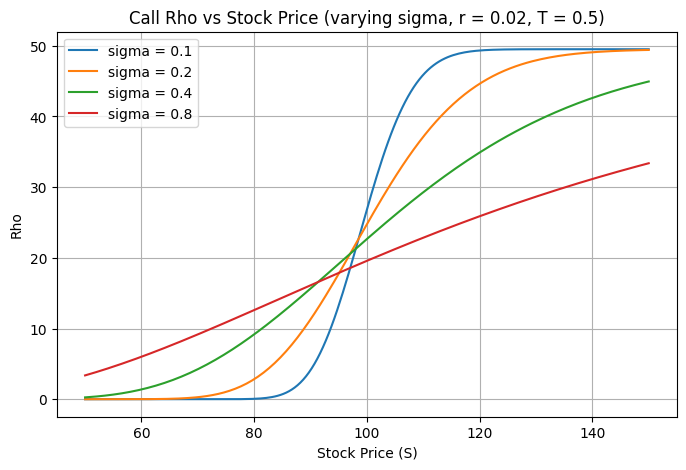

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes call rho
def call_rho(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * T * np.exp(-r * T) * norm.cdf(d2)

# Parameters
K = 100
r = 0.02      # fixed interest rate
T = 0.5       # fixed time to maturity

# Range of underlying prices
S_values = np.linspace(50, 150, 200)

# Different volatilities to compare
sigma_list = [0.10, 0.20, 0.40, 0.80]

plt.figure(figsize=(8,5))
for sigma in sigma_list:
    rho_vals = [call_rho(S, K, T, r, sigma) for S in S_values]
    plt.plot(S_values, rho_vals, label=f"sigma = {sigma}")

plt.title(f"Call Rho vs Stock Price (varying sigma, r = {r}, T = {T})")
plt.xlabel("Stock Price (S)")
plt.ylabel("Rho")
plt.legend()
plt.grid(True)
plt.show()


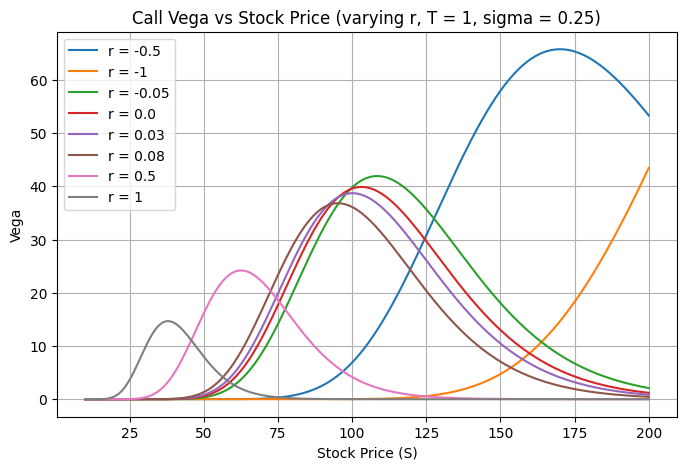

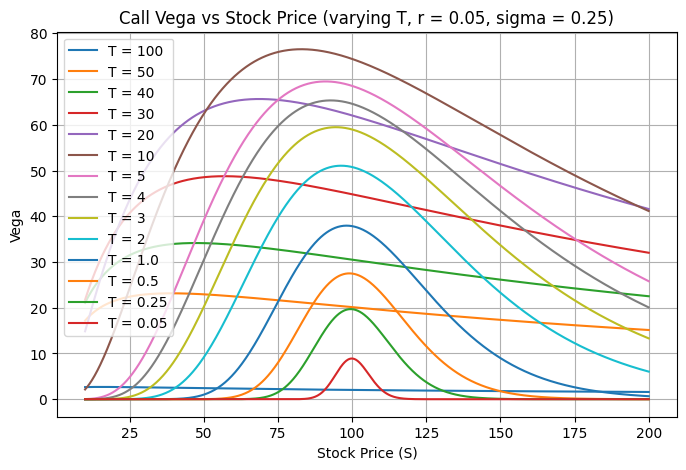

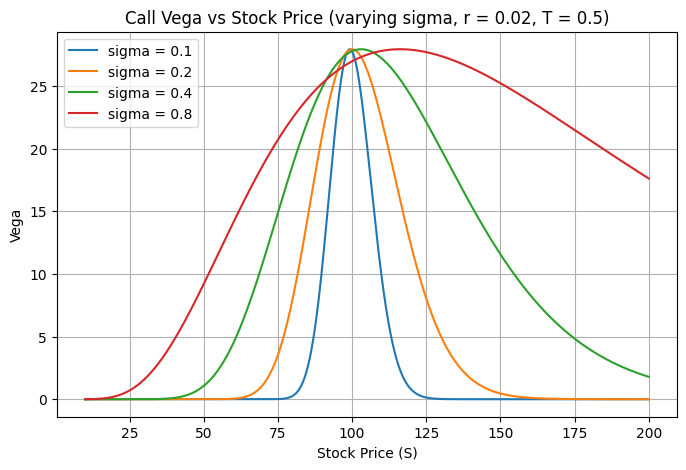

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes call vega
def call_vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T)

# Parameters
K = 100
S_values = np.linspace(10, 200, 1000)

# --- 1) Vega vs S for varying interest rates (fixed T, sigma) ---
T_fixed = 1
sigma_fixed = 0.25
r_list = [-0.5,-1,-0.05, 0.0, 0.03, 0.08,0.5,1]

plt.figure(figsize=(8,5))
for r in r_list:
    vega_vals = [call_vega(S, K, T_fixed, r, sigma_fixed) for S in S_values]
    plt.plot(S_values, vega_vals, label=f"r = {r}")
plt.title(f"Call Vega vs Stock Price (varying r, T = {T_fixed}, sigma = {sigma_fixed})")
plt.xlabel("Stock Price (S)")
plt.ylabel("Vega")
plt.legend()
plt.grid(True)
plt.show()

# --- 2) Vega vs S for varying T (fixed r, sigma) ---
r_fixed = 0.05
T_list = [100,50,40,30,20,10,5,4,3,2,1.0, 0.5, 0.25, 0.05]

plt.figure(figsize=(8,5))
for T in T_list:
    vega_vals = [call_vega(S, K, T, r_fixed, sigma_fixed) for S in S_values]
    plt.plot(S_values, vega_vals, label=f"T = {T}")
plt.title(f"Call Vega vs Stock Price (varying T, r = {r_fixed}, sigma = {sigma_fixed})")
plt.xlabel("Stock Price (S)")
plt.ylabel("Vega")
plt.legend()
plt.grid(True)
plt.show()

# --- 3) Vega vs S for varying sigma (fixed r, T) ---
T_fixed2 = 0.5
r_fixed2 = 0.02
sigma_list = [0.10, 0.20, 0.40, 0.80]

plt.figure(figsize=(8,5))
for sigma in sigma_list:
    vega_vals = [call_vega(S, K, T_fixed2, r_fixed2, sigma) for S in S_values]
    plt.plot(S_values, vega_vals, label=f"sigma = {sigma}")
plt.title(f"Call Vega vs Stock Price (varying sigma, r = {r_fixed2}, T = {T_fixed2})")
plt.xlabel("Stock Price (S)")
plt.ylabel("Vega")
plt.legend()
plt.grid(True)
plt.show()
